In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report
from keras import datasets
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test

In [3]:
# parsing through the dataset

img_row, img_cols = 28, 28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_cols, img_row, 1)
x_test = x_test.reshape(x_test.shape[0], img_cols, img_row, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [4]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000,)
Val_set shape: (12000, 28, 28, 1) val_label shape: (12000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


In [5]:
# normalization of data
x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [6]:
# formatting the data for model
num_labels = 10

y_train = keras.utils.to_categorical(y_train)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)
print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)
print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000, 10)
test set shape: (10000, 28, 28, 1) test label shape (10000, 10)
val set shape: (12000, 28, 28, 1) val_lavels shape: (12000, 10)


# LeNet5 Architecture

In [7]:
# Defining LeNet5 architecture

batch_size = 32
num_classes = 10
epochs = 50
input_img = Input(shape=(28,28,1))

model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

#Flatten the CNN output
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                252084    
__________

In [9]:
hist = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.3731 - acc: 0.8975 - val_loss: 0.2167 - val_acc: 0.9401
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1741 - acc: 0.9498 - val_loss: 0.1383 - val_acc: 0.9611
Epoch 3/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1146 - acc: 0.9676 - val_loss: 0.1035 - val_acc: 0.9718
Epoch 4/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0866 - acc: 0.9756 - val_loss: 0.0870 - val_acc: 0.9759
Epoch 5/50
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0718 - acc: 0.9801 - val_loss: 0.0761 - val_acc: 0.9790
Epoch 6/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0626 - acc: 0.9821 - val_loss: 0.0671 - val_acc: 0.9822
Epoch 7/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0552 - acc: 0.9842 - val_loss: 0.0620 - val_acc

In [10]:
score = model.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 491us/step
Test loss: 0.026854408886609598
Test accuracy: 0.9915


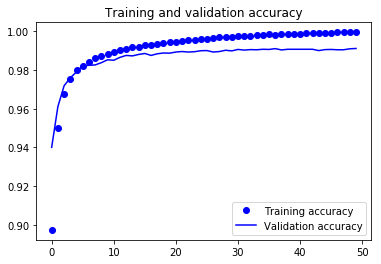

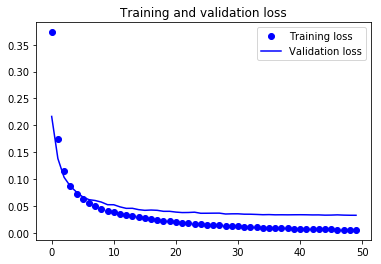

In [11]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [13]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



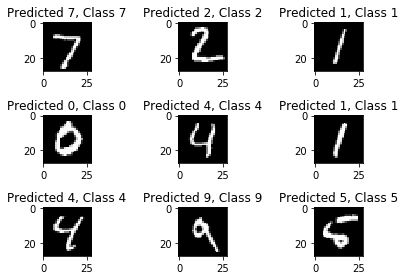

In [14]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

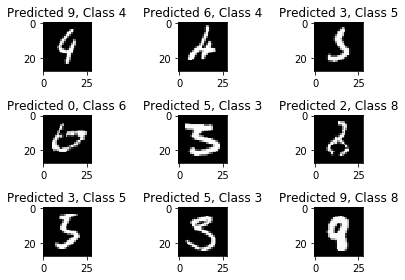

In [15]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()

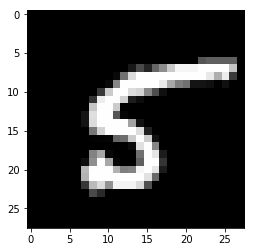

In [16]:
test_img = x_train[125]
plt.imshow(test_img.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

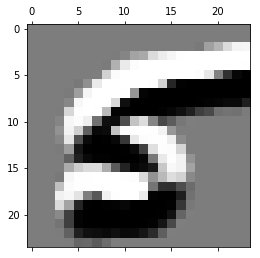

In [17]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_img.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')